<a href="https://colab.research.google.com/github/ardianthap/python-stock-analysis/blob/update-google-colab/IHSG_Stock_Market_Analysis_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Data Preparation

### Importing and Organising Dataset

The data was obtained from Yahoo Finance, intially imported using the yfinance package on this notebook

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# Visualisation module
import matplotlib.pyplot as plt # Chart plotting

# Importing on Google Colab
data = yf.download('^JKSE', start='2000-12-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,^JKSE,^JKSE,^JKSE,^JKSE,^JKSE
Date,,,,,
2001-01-02,410.189026,415.355848,407.581126,415.355848,843700
2001-01-03,405.813202,409.585058,402.366315,409.585058,1825000
2001-01-04,409.811066,409.941066,405.255243,407.254158,3289300
2001-01-05,418.803711,418.803711,410.884006,410.884006,6210600
2001-01-08,415.749817,418.731696,413.136942,418.731696,3666200


In [3]:
# Checking data completeness
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5930 entries, 2001-01-02 to 2025-06-05
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^JKSE)   5930 non-null   float64
 1   (High, ^JKSE)    5930 non-null   float64
 2   (Low, ^JKSE)     5930 non-null   float64
 3   (Open, ^JKSE)    5930 non-null   float64
 4   (Volume, ^JKSE)  5930 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 278.0 KB


In [4]:
# Checking index data type
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

The code below converted the Date column's data type into datetime and set it up as the index. Just to be safe, the order was also sorted.

In [5]:
# Converting Date data type
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values('Date')
    data.set_index('Date', inplace=True)

# Checkpoint: checking date index conversion
print('\n Date index after processing the Date column:')
print(data.head())


 Date index after processing the Date column:
Price            Close        High         Low        Open   Volume
Ticker           ^JKSE       ^JKSE       ^JKSE       ^JKSE    ^JKSE
Date                                                               
2001-01-02  410.189026  415.355848  407.581126  415.355848   843700
2001-01-03  405.813202  409.585058  402.366315  409.585058  1825000
2001-01-04  409.811066  409.941066  405.255243  407.254158  3289300
2001-01-05  418.803711  418.803711  410.884006  410.884006  6210600
2001-01-08  415.749817  418.731696  413.136942  418.731696  3666200


### Preparing the calculation and filtering

Creating a new column named '**Daily_Return**' and populating it with the daily percent changes, multiplying it by 100 to normalize the number in their percent (%) form. Any positive (negative) numbers reflected the Indonesia Stock Market Index's **Daily Return**.

In [6]:
# Calculating market's daily return and create a new column within the DataFrame
data['Daily_Return'] = data['Close'].pct_change() * 100
data['Daily_Return'].head()

,Daily_Return
Date,
2001-01-02,NaN
2001-01-03,-1.066782
2001-01-04,0.985149
2001-01-05,2.194339
2001-01-08,-0.729195


In [7]:
# Checking the updated DataFrame
data.tail()

Price,Close,High,Low,Open,Volume,Daily_Return
Ticker,^JKSE,^JKSE,^JKSE,^JKSE,^JKSE,
Date,,,,,,
2025-05-28,7175.818848,7237.340820,7166.678223,7223.513184,277488600,-0.321545
2025-06-02,7065.068848,7152.912109,7035.837891,7134.486816,240143000,-1.543378
2025-06-03,7044.821777,7090.351074,6994.155762,7071.638184,199730400,-0.286580
2025-06-04,7069.037109,7094.446777,7052.914062,7083.238770,232777400,0.343732
2025-06-05,7113.424805,7136.643066,7083.892090,7100.235840,193147800,0.627917


The code below prepared the condition and variables that will be used as future reference to filter the daily crash threhold.
<br>
- The variable '**daily_crash_threshold**' set on -6 will act as the threshold when filtering the daily return later; a new column named '**Daily_Crash**' was assigned to rows where **Daily_Return** values are less than or equal to the **daily_crash_threshold**.
<br>
- The cell below further executed the filtering by saving the rows that returned True or having daily return <= crash threshold (**-6%**) to **daily_crashes**


In [8]:
# Define a threshold for a daily crash (drop more than 6%)
daily_crash_threshold = -6
data['Daily_Crash'] = data['Daily_Return'] <= daily_crash_threshold

# Fiter and display rows when daily crashses occurred
daily_crashes = data.loc[data['Daily_Crash'], :]
print(f'List of daily crashes occured:\n')
daily_crashes

List of daily crashes occured:



Price,Close,High,Low,Open,Volume,Daily_Return,Daily_Crash
Ticker,^JKSE,^JKSE,^JKSE,^JKSE,^JKSE,,
Date,,,,,,,
2002-10-14,337.461853,370.900552,334.717941,370.900552,12072800,-10.357116,True
2004-05-17,668.450989,718.550053,665.933081,718.550053,17049600,-7.503984,True
2006-05-15,1429.486450,1496.973818,1426.994604,1496.973818,35249800,-6.307462,True
2006-05-22,1308.994141,1397.363629,1304.294250,1395.906776,30850500,-6.026248,True
2007-08-15,2029.004028,2121.854418,2019.558351,2121.854418,40303900,-6.435150,True
2008-01-22,2294.434570,2375.789556,2229.732256,2375.789556,45795900,-7.697684,True
2008-10-06,1648.674927,1766.866377,1634.481509,1766.866377,31611000,-10.690254,True
2008-10-08,1451.612427,1565.677077,1451.612427,1564.961041,10771000,-10.375372,True


Below, I checked if there is any null values or abnormalities after setting up the filtering so far

In [9]:
# Checkpoint - checking if any rows are empty
print(f'Data shape: {data.shape}')
print(f'Null Close prices: {data["Close"].isna().sum()}')

Data shape: (5930, 7)
Null Close prices: Ticker
^JKSE    0
dtype: int64


## <center> Plotting the Chart - Daily Crashes and Drawdowns

### Highlighting daily crashes

The cell below plotted the movement of IHSG daily **closing price** along the years, marking the dates where crashes occur filtered on the column **Daily_Crash**.

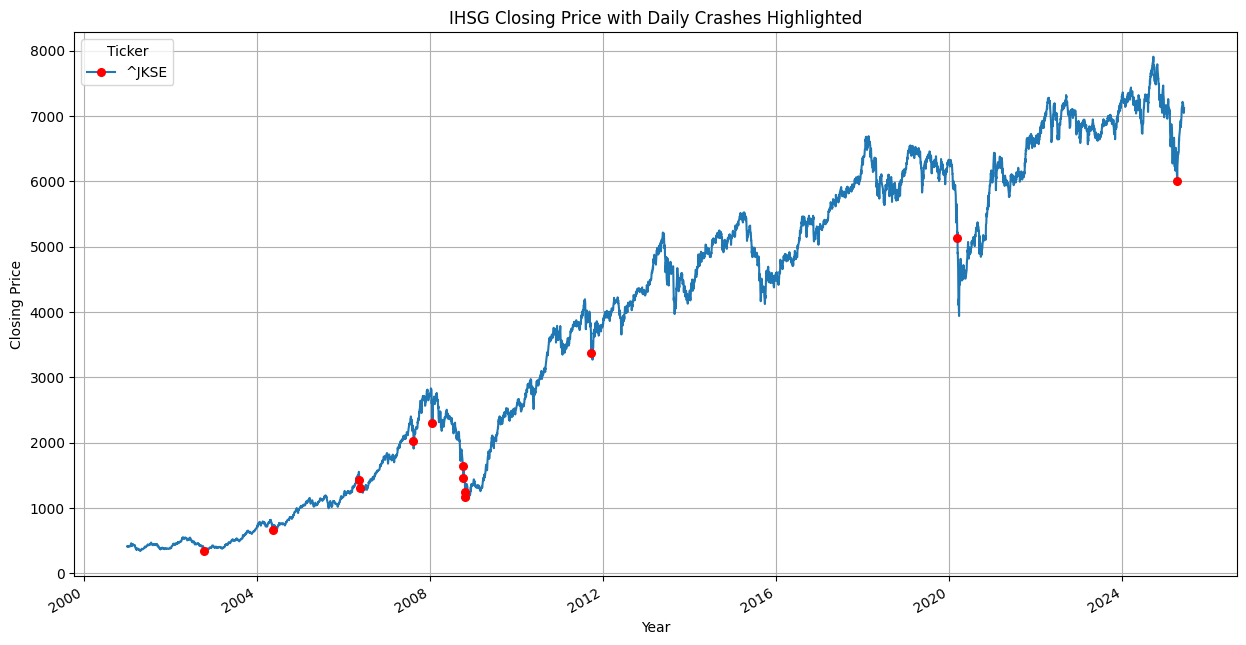

In [10]:
# Ploting Daily Crashes chart
data['Close'].plot(markevery=data['Daily_Crash'], # Give markers to every daily crash points
                   marker='o', ms = 5.5, mec='r', mfc='r',
                  figsize=(15, 8))

# Give label to the chart
plt.title('IHSG Closing Price with Daily Crashes Highlighted')
plt.xlabel('Year')
plt.ylabel('Closing Price')

# Save the figure
plt.savefig('IHSG Closing Price with Daily Crashes Overtime.png', dpi=300)

plt.grid()
plt.show()

A brief look shows that these _daily crashses_ points are not highly indicative of the start of a bearish sentiment. It can be said even, that these points might mark the point of incoming market correction.
<br>

Unfortunately, these daily crash points can only display descriptive historical data points without meaningful insight and additional context. A further elaboration of market stress is imperative.
<br>

A classification whether any particular market stress clustered together can also describe a prolonged bearish sentiment of the Stock Market. Analysts should be able to cross-check the clustered drawdowns as a consensus on the general negative sentiment in the market

### Highlighting Drawdowns - Market Stress

<center> Finding the highest value over time and the percentage drop from it.</center><br>
This was done by sorting for the cumulative maximum and calculating the drawdown (percentage drop from cumulative maximum).
<br>

- **data['Cumulative_Max']** showed the latest cumulative maximum value the market ever reached, the value will change and replaced when there is a higher maximum value.
<br>
- **data['Drawdown']** should show the daily _value change_ (in percentage) compared to the latest cumulative maximum value.

In [11]:
# Calculate cumulative max and drawdown (% drop from the cumulative max)
data['Cumulative_Max'] = data['Close'].cummax()
data['Drawdown'] = (((data.iloc[:, 1] - data.iloc[:, -1]) / data.iloc[:, -1]) * 100)

# Checkpoint - checking the calculation's result
print(data['Cumulative_Max'].tail())
print(data['Drawdown'].tail())

Date
2025-05-28    7905.390137
2025-06-02    7905.390137
2025-06-03    7905.390137
2025-06-04    7905.390137
2025-06-05    7905.390137
Name: Cumulative_Max, dtype: float64
Date
2025-05-28    -8.450555
2025-06-02    -9.518544
2025-06-03   -10.309916
2025-06-04   -10.258107
2025-06-05    -9.724341
Name: Drawdown, dtype: float64


After defining the **drawdown_threshold** as **-20**, the cell below plotted threshold across the chart, marking the points where any drawdowns surpassed the threshold indicating an apparent market stress.

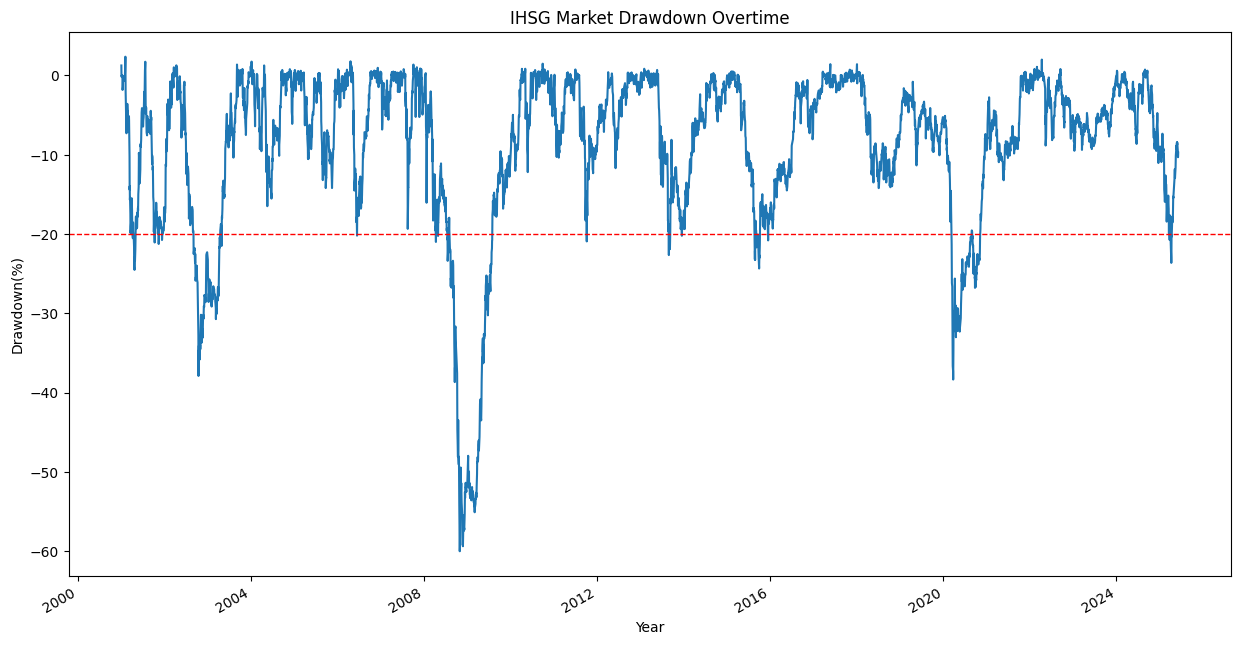

In [12]:
# Highlighting the drawdowns overtime
drawdown_threshold = -20 # Defining threshold mark at 20%

# Plot the chart
data['Drawdown'].plot(figsize=(15, 8))

# Mark the Drawdown Threshold
plt.axhline(y=-20, color='r', linestyle='dashed', linewidth=1)

# Give label to the chart
plt.title('IHSG Market Drawdown Overtime')
plt.xlabel('Year')
plt.ylabel('Drawdown(%)')

# Save the figure
plt.savefig('IHSG Market Drawdown Overtime.png', dpi=300)

plt.show()

Market Drawdowns were consistent with major crashes in global context.<br><br>
1. 2002 Dot-com bubble crash
2. 2008 Stock market crash
3. 2020, March, Covid-19 onset
4. 2025 USA initiation of high Tariff globally


<p>Although in 2025 there was a visible steady decline coinciding with the political unrest in Indonesia at the time, with various harsh critics from the public regarding President Prabowo's stance in his economic policy and response regarding demonstrations/protests that had been happening in diverse forms and topics across the Indonesia. </p>
<br>

Let's identify specifically when and to what magnitude did these major crashes occur. The cell below further stored the values of these drawdown periods in variable **crash_drawdowns**. This variable will be used later to identify clusters of market drawdowns.
<br>
I sorted the **Drawdown's value (%)** in to briefly display time period from the most severe to the least market stress occurred.  

In [13]:
# Displaying specific rows where major Crashes happen

crash_drawdowns = data[data['Drawdown'] <= drawdown_threshold]
print('Dates where Major Crashes happen:\n')
print(crash_drawdowns[['Close', 'Cumulative_Max', 'Drawdown']].dropna().sort_values(by='Drawdown'))

Dates where Major Crashes happen:

Price             Close Cumulative_Max   Drawdown
Ticker            ^JKSE                          
Date                                             
2008-10-28  1111.346802    2830.152832 -60.012264
2008-10-29  1113.580688    2830.152832 -59.490336
2008-11-24  1141.356689    2830.152832 -59.379603
2008-11-20  1154.925049    2830.152832 -59.097969
2008-11-21  1146.231323    2830.152832 -59.096735
...                 ...            ...        ...
2001-05-02   362.707886     458.934143 -20.166374
2020-08-25  5338.888184    6689.287109 -20.150281
2015-09-18  4380.148926    5523.074707 -20.075591
2011-10-04  3269.323730    4193.277832 -20.056225
2015-09-02  4401.122070    5523.074707 -20.022817

[615 rows x 3 columns]


## <center> Analyzing Periods of Crashses

### Highlighting Drawdown Clusters

The cell below gathered prolonged drawdown periods as separate clusters. Any drawdowns were defined as in a cluster when they persist at least for three days in a row.

I preparing Clusters DataFrame for easier manipulation as well, this should make it easier to identify periods that have the longest period of market stress.

In [14]:
# Displaying market stress clusters - sorted from the longest
drawdown_dates = data.index[data['Drawdown'] <= drawdown_threshold] # Assign a variable to values below the drawdown threshold.
clusters = [] # Create an empty list to fill with identified clusters later
current_cluster = [] # Create an empty list

# Create a For loop to set the condition and fill the blank list
for date in drawdown_dates:
    if not current_cluster:
        current_cluster.append(date)
    else:
        if (date - current_cluster[-1]).days <= 3:
            current_cluster.append(date)
        else:
            clusters.append(current_cluster)
            current_cluster = [date]
if current_cluster:
    clusters.append(current_cluster)

print('Identifying crash clusters based on drawdown threshold, sorted Descending: \n')
cluster_data = [] # Create an empty list
for idx, cluster in enumerate(clusters): # Populate the list with dictionaries
    cluster_data.append({'Cluster number': f'Cluster {idx+1}',
                         'Cluster period': cluster,
                         'Total days': len(cluster)})

# Convert the list of dictionaries into a Dataframe for easier manipulation
cluster_data = pd.DataFrame(cluster_data)
cluster_data = cluster_data.set_index('Cluster number')

# Sort by number of days to notice the longest drawdown periods
print(cluster_data.sort_values(by='Total days', ascending=False))

Identifying crash clusters based on drawdown threshold, sorted Descending: 

                                                   Cluster period  Total days
Cluster number                                                               
Cluster 26      [2009-04-13 00:00:00, 2009-04-14 00:00:00, 200...          67
Cluster 40      [2020-06-02 00:00:00, 2020-06-03 00:00:00, 202...          43
Cluster 7       [2002-10-07 00:00:00, 2002-10-08 00:00:00, 200...          43
Cluster 10      [2003-01-02 00:00:00, 2003-01-03 00:00:00, 200...          41
Cluster 44      [2020-09-01 00:00:00, 2020-09-02 00:00:00, 202...          41
Cluster 20      [2008-10-13 00:00:00, 2008-10-14 00:00:00, 200...          40
Cluster 11      [2003-03-04 00:00:00, 2003-03-05 00:00:00, 200...          31
Cluster 18      [2008-08-19 00:00:00, 2008-08-20 00:00:00, 200...          29
Cluster 24      [2009-01-27 00:00:00, 2009-01-28 00:00:00, 200...          29
Cluster 6       [2002-09-03 00:00:00, 2002-09-04 00:00:00, 200...

##### The graphs below zoom in on the market stress clusters to reveal more details on different indicators during the clusters:
- Closing price
- Daily return
- Drawdown (%) from the last cumulative peak

#### <center>The Longest Market Stress Cluster</center>

Cluster during 2009-04-13 to 2009-07-17



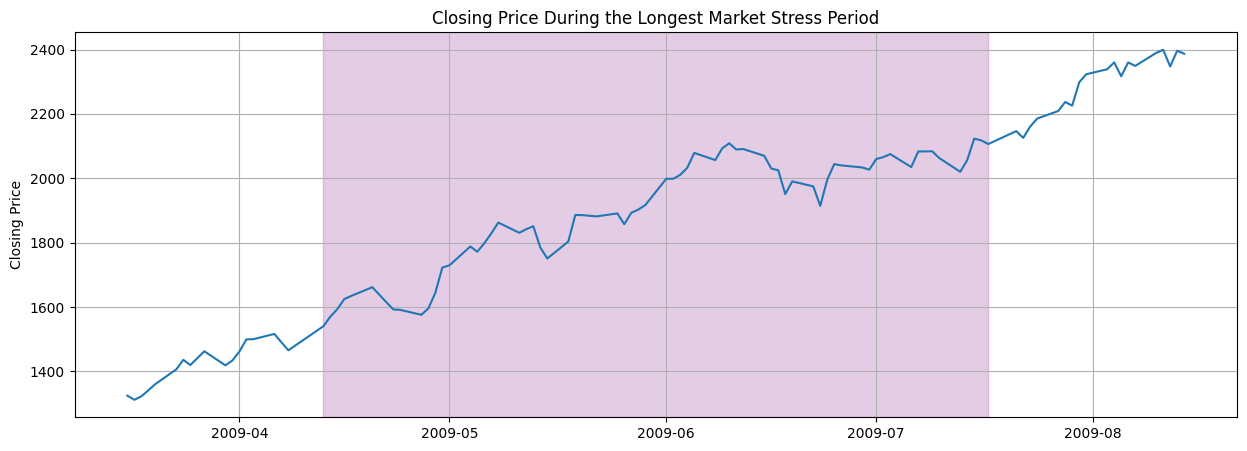

In [15]:
# Displaying the Closing Price during the Longest Market Stress Clusters
cluster_data_sorted = cluster_data.sort_values(by='Total days', ascending=False)

cluster_date = cluster_data_sorted.iloc[0, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Closing Price During the Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Close']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.ylabel('Closing Price')
plt.grid()

# Save the figure
plt.savefig('Closing Price During the Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2009-04-13 to 2009-07-17



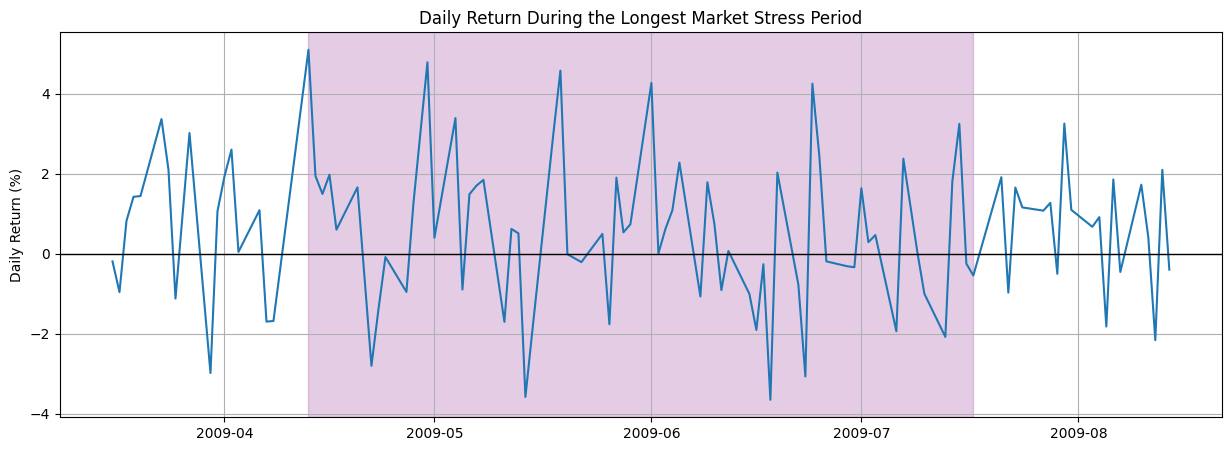

In [16]:
# Displaying Daily Return during the Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[0, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Return During the Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Daily_Return']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.ylabel('Daily Return (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Returns During the Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2009-04-13 to 2009-07-17



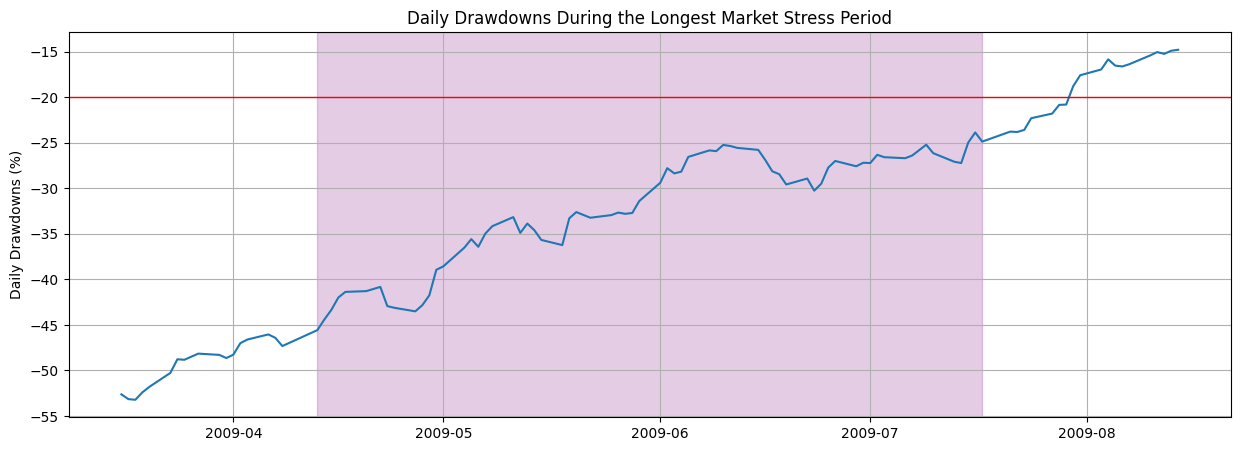

In [17]:
# Displaying Daily Drawdowns during the Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[0, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Drawdowns During the Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Drawdown']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=-20, color='red', linestyle='-', linewidth=1)
plt.ylabel('Daily Drawdowns (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Drawdowns During the Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

#### <center>The Second Longest Market Stress Cluster </center>

Cluster during 2020-06-02 to 2020-07-30



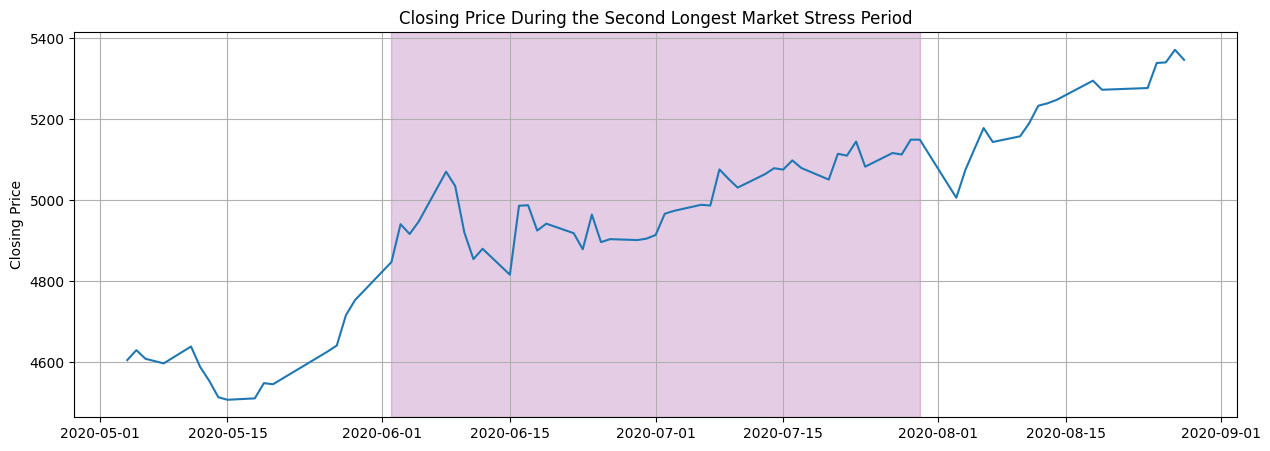

In [18]:
# Displaying the Closing Price during the Second Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[1, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Closing Price During the Second Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Close']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.ylabel('Closing Price')
plt.grid()

# Save the figure
plt.savefig('Closing Price During the Second Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2020-06-02 to 2020-07-30



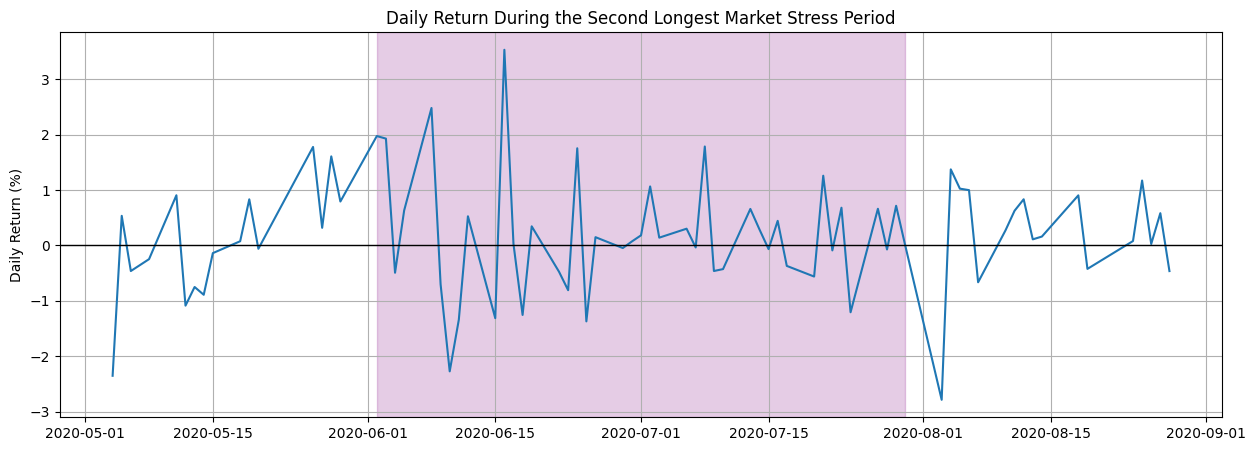

In [19]:
# Displaying Daily Return during the Second Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[1, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Return During the Second Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Daily_Return']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.ylabel('Daily Return (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Returns During the Second Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2020-06-02 to 2020-07-30



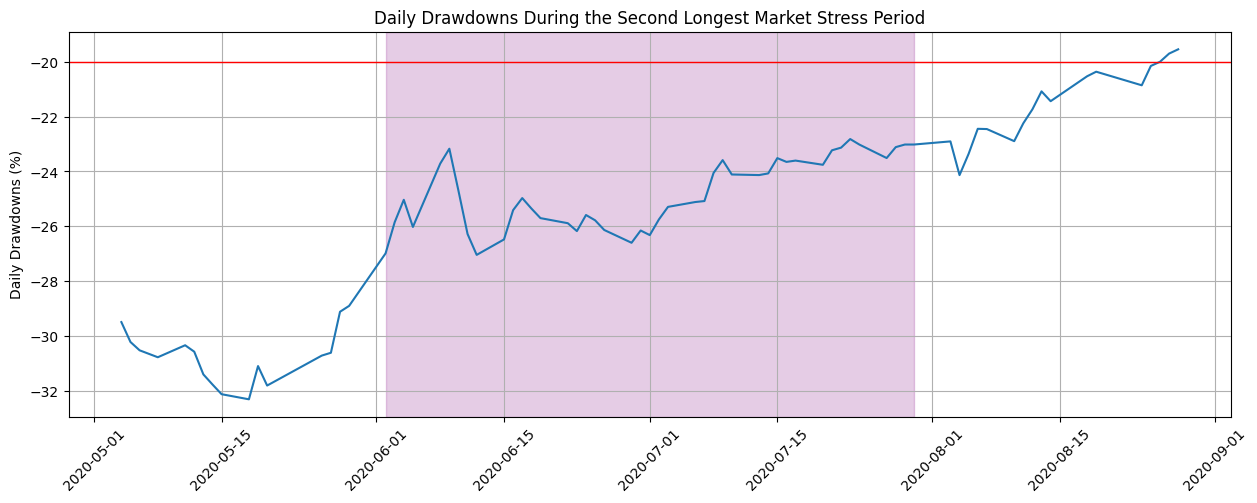

In [20]:
# Displaying Daily Drawdowns during the Second Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[1, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Drawdowns During the Second Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Drawdown']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=-20, color='red', linestyle='-', linewidth=1)
plt.xticks(rotation=45) # Rotate the date 45 degrees for better visibility
plt.ylabel('Daily Drawdowns (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Drawdowns During the Second Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

#### <center>The Third Longest Market Stress Cluster</center>

Cluster during 2002-10-07 to 2002-12-04



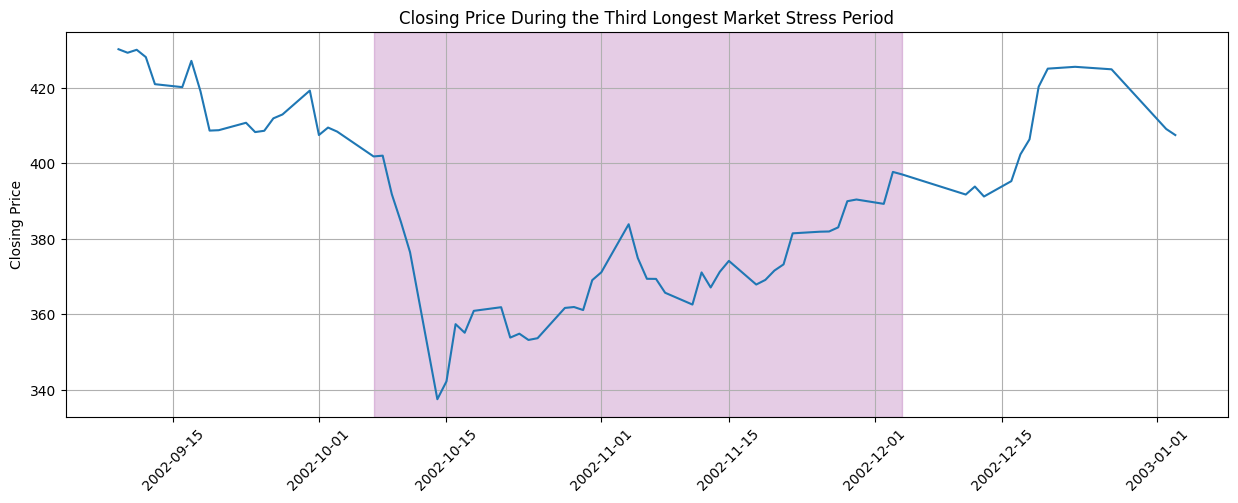

In [21]:
# Displaying the Closing Price during the Third Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[2, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Closing Price During the Third Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Close']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.xticks(rotation=45) # Rotate the date 45 degrees for better visibility
plt.ylabel('Closing Price')
plt.grid()

# Save the figure
plt.savefig('Closing Price During the Third Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2002-10-07 to 2002-12-04



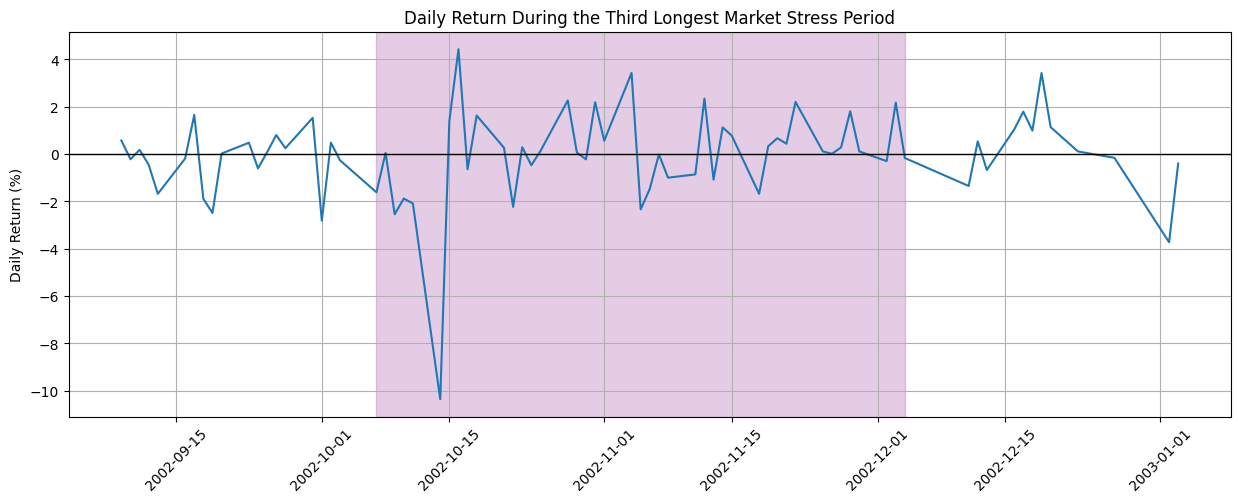

In [22]:
# Displaying Daily Return during the Third Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[2, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Return During the Third Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Daily_Return']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.xticks(rotation=45) # Rotate the date 45 degrees for better visibility
plt.ylabel('Daily Return (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Returns During the Third Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2002-10-07 to 2002-12-04



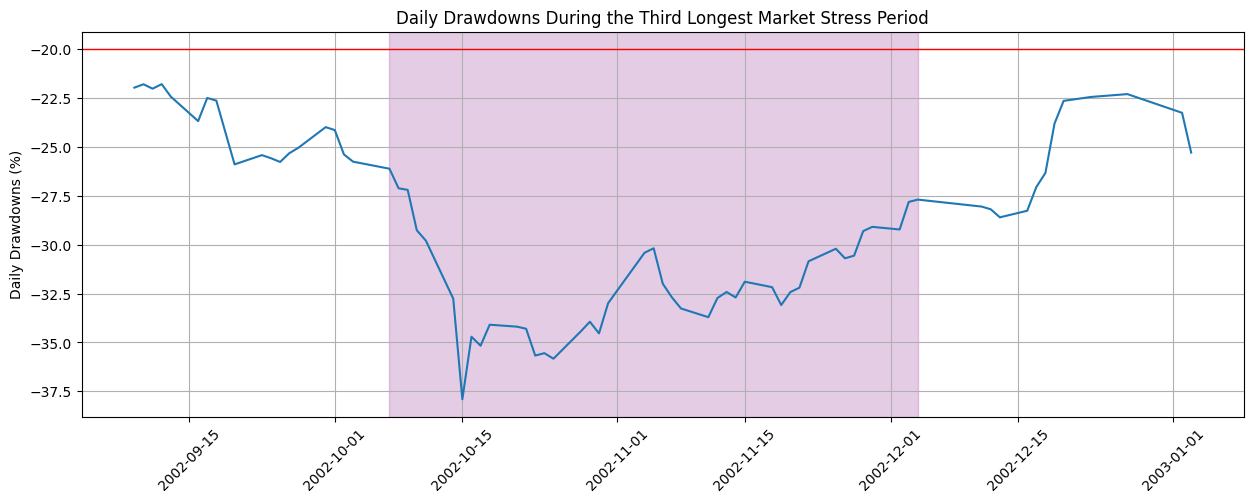

In [23]:
# Displaying Daily Drawdowns during the Third Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[2, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Drawdowns During the Third Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Drawdown']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=-20, color='red', linestyle='-', linewidth=1)
plt.xticks(rotation=45) # Rotate the date 45 degrees for better visibility
plt.ylabel('Daily Drawdowns (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Drawdowns During the Third Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

#### Analyzing market stress patterns - Key Takeaways

The charts above showed the longest period where major market stress happened. Between these three charts, we can observe a different pattern occuring on the first one. Albeit its major drawdowns, the market price actually is in its process of recovering from the crash, while the other two are in the midst of experiencing tumultuous market sentiment.

From a simple observation, it is obvious that albeit similarities of crash pattern and their subsequent rebound, these market periods experienced a different
<br>

We will observe further on the market return to learn further how the market developed throughout its drawdown clusters.

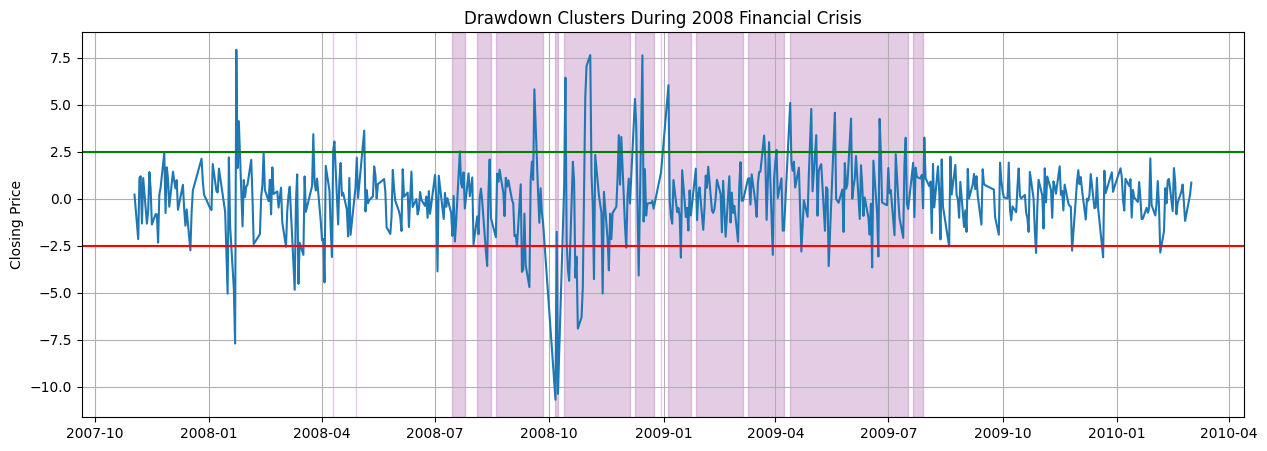

In [24]:
# Highlighting Drawdown Clusters during the 2008 Global Financial Crisis

# Define the period range
start_date = pd.Timestamp('2008-01-01')
end_date = pd.Timestamp('2010-01-01')

# Filtering clusters within the specified time range
clusters_in_range = []
for cluster in cluster_data['Cluster period']:
    cluster_start = cluster[0] # Define the start of looped cluster
    cluster_end = cluster[-1] # Define the end of looped cluster

    # Check if the cluster overlaps with the specified range
    if cluster_start >= start_date and cluster_end <= end_date:
        clusters_in_range.append((cluster_start, cluster_end))

# Condition to filter out clusters that last for at least a month
zoom_start = start_date - pd.Timedelta(days=60) # Define the date range for zoom starting point
zoom_end = end_date + pd.Timedelta(days=60) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Drawdown Clusters During 2008 Financial Crisis')
plt.plot(zoom_data.index, zoom_data['Daily_Return']) # Set the X and Y axis
plt.axhline(y=2.5, color='green', label='High', linewidth=1.5)
plt.axhline(y=-2.5, color='red', label='Low', linewidth=1.5)

# Highlighting clusters
for cluster_start, cluster_end in clusters_in_range:
    plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)

plt.ylabel('Closing Price')
plt.grid()

## <center> Develop Early Warning Signals

The code below will generate a randomly simulated (synthetic) data for IHSG index **daily returns** in business days. The code employs NumPy's random.seed for reproducibility of simulated data. It will generate numbers randomly following normal distribution pattern. The normal distribution will be generated by defining the simulation's period mean and standard deviation.

10-day moving average was chosen as the mean's and standard deviation timeframe to capture short-term fluctuations, to better represent the model's attempt in detecting warning signals. Thus, the modeling process will be:

1. Calculating the historical 10-day rolling mean and std deviation, notice the most apparent pattern
2. Apply them to the random number generator code
3. Define the early warning model by referring to the historical calculation

The data, however, will need to be regularly updated to gain more accurate simulation of current IHSG's latest simulated numbers.

In [25]:
# Calculate the 10-day rolling Mean and Std Deviation

# Calculate the 10-day rolling mean
data['Rolling_Mean_Return'] = data['Daily_Return'].rolling(window=10).mean()
# Check the mean percentiles
print(f"Daily Return's mean's 5% percentile: {round(data['Rolling_Mean_Return'].quantile(0.05), 3)}%") # Mean's far-left tail

# Calculate the 10-day rolling std. deviation
data['Rolling_Stdev_Return'] = data['Daily_Return'].rolling(window=10).std()
# Check the std deviation percentiles
print(f"Daily Return's standard deviation's 95% percentile: {round(data['Rolling_Stdev_Return'].quantile(0.95), 3)}%") # Stdev's far-right tail

Daily Return's mean's 5% percentile: -0.587%
Daily Return's standard deviation's 95% percentile: 2.244%


In [26]:
# Calculate the typical - most probable mean and volatility (std deviation)

# Normal mean
print(f"Daily Return's normal average trend state : {round(data['Rolling_Mean_Return'].quantile(0.68), 3)}%")

# Normal std deviation
print(f"Daily Return's normal volatility trend state : {round(data['Rolling_Stdev_Return'].quantile(0.68), 3)}%")

Daily Return's normal average trend state : 0.209%
Daily Return's normal volatility trend state : 1.149%


In [27]:
EWS_simulation_assumption = pd.DataFrame({
    'lower_mean_threshold' : [round(data['Rolling_Mean_Return'].quantile(0.05), 3)],
    'upper_volatility_threshold' : [round(data['Rolling_Stdev_Return'].quantile(0.95), 3)],
    'typical_mean' : [round(data['Rolling_Mean_Return'].quantile(0.68), 3)],
    'typical_stdev' : [round(data['Rolling_Stdev_Return'].quantile(0.68), 3)]
                          })

EWS_simulation_assumption

,lower_mean_threshold,upper_volatility_threshold,typical_mean,typical_stdev
0,-0.587,2.244,0.209,1.149


The code above found:

- The lowest short-term (_10-day_) average for Daily Return is: **-0.588%**. Thus this will be used as the threshold for _unusual_ low average return during extreme market conditions.
- The upper bounds of volatility that can be considered as _unusual_ in short-term (_10-day_) standard deviation calculation is: **2.229%**. Thus this will be used as the high volatility threshold during extreme market conditions.

For comparison, the typical 10-day rolling:
- Daily Return average: **0.2%**
- Standard deviation: **1.15**

In [28]:
# Checkpoint - checking latest price in 2025 to start the simulation
print(data.iloc[-1, 0])

7113.4248046875


In [ ]:
data.tail(1)

Price,Close,High,Low,Open,Volume,Daily_Return,Daily_Crash,Cumulative_Max,Drawdown,Rolling_Mean_Return,Rolling_Stdev_Return
Ticker,^JKSE,^JKSE,^JKSE,^JKSE,^JKSE,,,,,,
Date,,,,,,,,,,,
2025-06-05,7113.424805,7136.643066,7083.89209,7100.23584,193147800,0.627917,False,7905.390137,-9.724341,0.028624,0.685394


In [33]:
# Define the dates for the model -> use current date
dates_2025 = pd.bdate_range(start='2025-06-05', end='2025-12-31')

bullish_dates = len(dates_2025) * 0.6
type(bullish_dates)

float

The latest market price available from the Data is: **7113.42**. This will be used as the start of the simulated market price.
Because the data ended at **2025-06-05**, the frequency of numbers will follow the number of business days left in the year.

In [41]:
# Set up seed for a fixed set of random numbers - Seed 2.
np.random.seed(2)

# Define the dates for the model -> use current date
dates_2025 = pd.bdate_range(start='2025-06-05', end='2025-12-31')

# Preparing the signalling simulation
daily_returns = np.zeros(len(dates_2025)) # Store consecutive zeros following number of B-days left in the year
normal_dist = int(len(dates_2025) * 0.6)
crash_dist = int(len(dates_2025) * 0.2)
recovery_dist = int(len(dates_2025) * 0.2)

# Generate random numbers in Normal Distribution to populate the simulated all year long daily returns
daily_returns[:normal_dist] = np.random.normal(loc=0.002, scale=0.0115, size=normal_dist) # Slight bullish period - normal
daily_returns[normal_dist : normal_dist + crash_dist] = np.random.normal(loc=-0.00588, scale=0.0229, size=crash_dist) # Simulated crash period
daily_returns[normal_dist + crash_dist:] = np.random.normal(loc=0.002, scale=0.0115, size=recovery_dist) # Slight bullish period - recovery


# Price simulation starts here
prices = [7113.42] # Use the latest price at 2025-04-10
for ret in daily_returns:
    prices.append(prices[-1] * (1 + ret)) # Append simulated compounded growth using synthetic numbers
prices = prices[1:]

# Storing the simulated data
simulated_2025 = pd.DataFrame({
    'Date' : dates_2025,
    'Close' : prices,
    'Daily_Return' : daily_returns
})

# Set the date column as index
simulated_2025.set_index('Date', inplace=True)

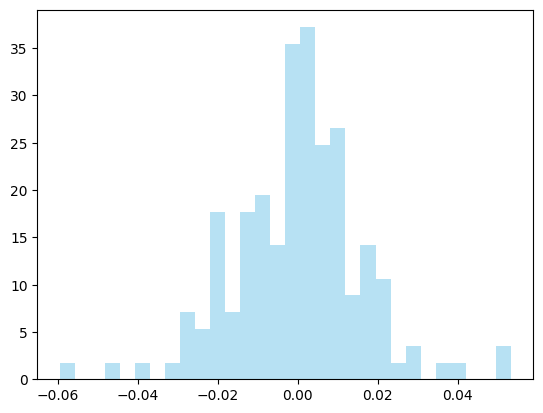

In [42]:
# Checkpoint - checking the normal distribution, in 30 day-monthly bins
plt.hist(daily_returns, bins=30, density=True, alpha=0.6, color='skyblue')
plt.show()

In [43]:
# Compute the rolling mean and volatility for the simulated data
# Calculate the 10-day rolling mean
simulated_2025['Rolling_Mean_Return'] = simulated_2025['Daily_Return'].rolling(window=10).mean()

# Calculate the 10-day rolling std. deviation
simulated_2025['Rolling_Stdev_Return'] = simulated_2025['Daily_Return'].rolling(window=10).std()

# Set up the warning condition
warning_condition = (simulated_2025['Rolling_Mean_Return'] < -0.00588) & (simulated_2025['Rolling_Stdev_Return'] > 0.0229)
simulated_2025['Warning'] = warning_condition # Store in the simulation dataframe

warnings_df = simulated_2025[simulated_2025['Warning']]
print('Simulated early warning signals 2025:')
print(warnings_df[['Close', 'Daily_Return', 'Rolling_Mean_Return', 'Rolling_Stdev_Return']])

Simulated early warning signals 2025:
                  Close  Daily_Return  Rolling_Mean_Return  \
Date                                                         
2025-10-28  7091.122075      0.004038            -0.007841   
2025-11-18  6607.030058      0.052525            -0.012365   
2025-11-19  6345.288153     -0.039616            -0.014403   
2025-11-20  6283.445265     -0.009746            -0.014045   
2025-11-21  6327.256905      0.006973            -0.011477   
2025-11-24  6316.366615     -0.001721            -0.008995   
2025-11-25  6359.785219      0.006874            -0.006366   

            Rolling_Stdev_Return  
Date                              
2025-10-28              0.028624  
2025-11-18              0.023304  
2025-11-19              0.024814  
2025-11-20              0.024857  
2025-11-21              0.025636  
2025-11-24              0.025213  
2025-11-25              0.025376  


#### Plotting the Early Warning Signals chart

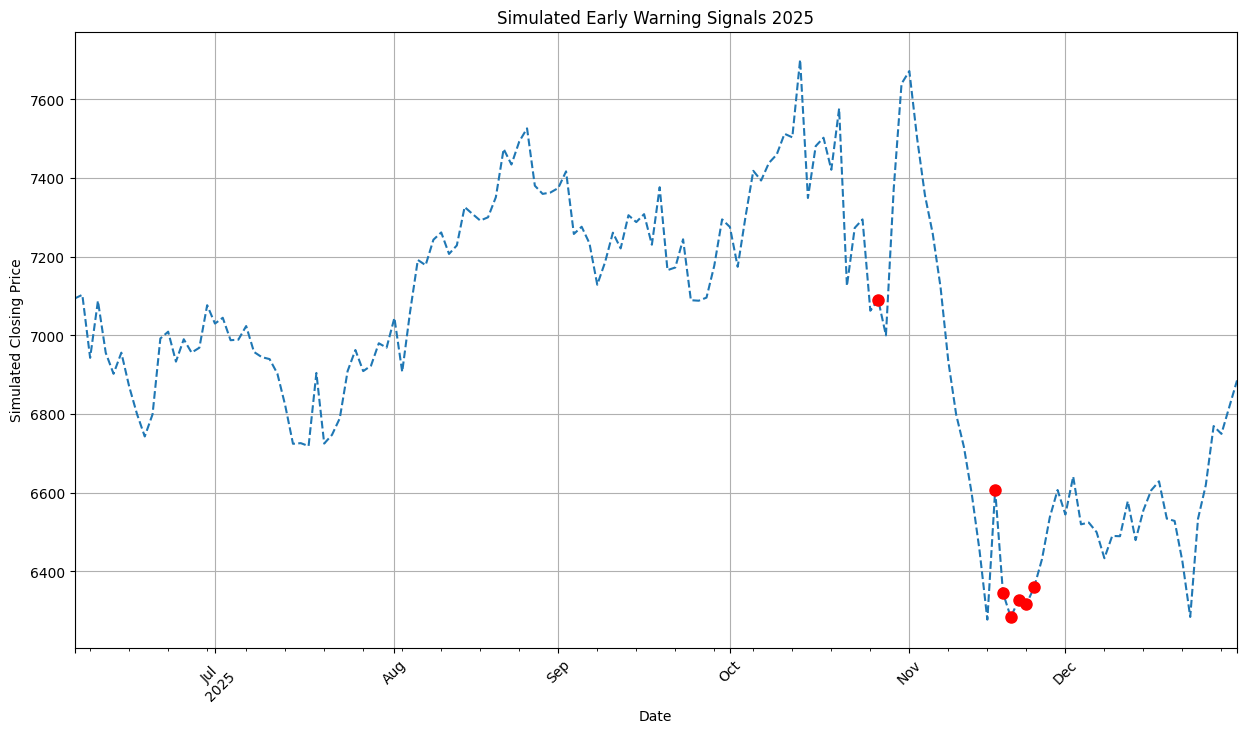

In [44]:
plt.figure(figsize=(15, 5)) # Set up the figure

# Plot the chart
simulated_2025['Close'].plot(markevery=simulated_2025['Warning'],
                   marker='o', ms = 8, mec='r', mfc='r',
                  linestyle='dashed', figsize=(15, 8))

plt.title('Simulated Early Warning Signals 2025')
plt.xticks(rotation=45) # Rotate the date 45 degrees for better visibility
plt.ylabel('Simulated Closing Price')
plt.grid()

plt.show() # Plot the chart